# Physician Drug Adoption Prediction

One of the top 5 pharmaceutical companies, Axtratia, headquartered in the US, had launched Axtenna, a drug for the treatment of stage 1 chronic kidney disease, 2.5 years ago. However, some physicians are yet to prescribe it for the first time. A key client stakeholder has reached out to a Decision Sciences Principal in Axtria for help to identify potential physicians who are most likely to start prescribing the drug in the next quarter in order to channelize the marketing efforts more effectively while targeting potential physicians.

### Problem Statement:
To create a model that `identifies the prospective physicians` who have high likelihood to start prescribing the drug in `11th quarter for the first time`.

### Importing and Merging Data

In [1184]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1185]:
# Importing all datasets
phy_activity = pd.read_csv(r'C:\Users\hp.LAPTOP-MVJ2BS37\OneDrive\Documents\Jupiter Notebook\Files\Axtria_Round2\Training Data\Physician_activity_over_past_10_quarters.csv')
phy_data = pd.read_csv(r'C:\Users\hp.LAPTOP-MVJ2BS37\OneDrive\Documents\Jupiter Notebook\Files\Axtria_Round2\Training Data\Individual_physician_data.csv')


In [1186]:
print(len(phy_activity))
print(len(phy_data))

100000
10000


In [1187]:
#Merging on 'customerID'
physician = pd.merge(phy_activity, phy_data, how='outer', on='physician_id')

In [1188]:
physician.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,201802,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.91,0.89,M,58,83,nephrology
1,1,201803,0,10,11,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0.91,0.89,M,58,83,nephrology
2,1,201804,1,8,8,0,0,0,0,0,1,24,13,17,23,46,15,0,0,0,0,1,1,109,19,NaN,0.91,0.89,M,58,83,nephrology
3,1,201901,1,11,24,0,0,0,0,0,1,50,26,29,36,90,29,0,0,0,0,1,1,204,18,NaN,0.91,0.89,M,58,83,nephrology
4,1,201902,1,15,44,0,0,0,0,0,1,49,18,30,32,73,35,0,0,0,0,1,1,180,37,NaN,0.91,0.89,M,58,83,nephrology


In [1189]:
# Let's see the type of each column
physician.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   physician_id                                         100000 non-null  int64  
 1   year_quarter                                         100000 non-null  int64  
 2   brand_prescribed                                     100000 non-null  int64  
 3   total_representative_visits                          100000 non-null  int64  
 4   total_sample_dropped                                 100000 non-null  int64  
 5   saving_cards_dropped                                 100000 non-null  int64  
 6   vouchers_dropped                                     100000 non-null  int64  
 7   total_seminar_as_attendee                            100000 non-null  int64  
 8   total_seminar_as_speaker                             10

In [1190]:
physician.shape

(100000, 32)

In [1191]:
physician.describe()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_tenure,physician_age
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5000.500000,201902.500000,0.453850,7.506650,9.702910,0.74199,0.125300,0.136530,0.04013,0.185100,0.958200,77.040460,47.684210,79.774910,77.352210,98.300430,40.610380,1.733090,1.593150,0.204750,0.310640,0.842560,0.901500,337.530720,51.999210,0.920926,0.643073,28.058500,60.116900
std,2886.765765,77.078592,0.497868,6.672713,26.254091,3.26853,1.255713,0.405131,0.70429,0.388381,0.200133,84.540337,84.315863,97.928026,94.695333,147.514147,104.658218,7.594929,11.755728,0.741912,1.961122,0.364217,0.297991,393.584016,87.135455,0.167215,0.322035,13.326359,14.072598
min,1.000000,201802.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,3.000000,28.000000
25%,2500.750000,201804.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,18.000000,3.000000,15.000000,10.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.000000,2.000000,0.930000,0.350000,18.000000,51.000000
50%,5000.500000,201902.500000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,57.000000,19.000000,55.000000,49.000000,45.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,236.000000,23.000000,1.000000,0.840000,29.000000,61.000000
75%,7500.250000,202001.000000,1.000000,11.000000,9.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,109.000000,58.000000,112.000000,110.000000,135.000000,28.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,475.000000,66.000000,1.000000,0.920000,38.000000,70.000000
max,10000.000000,202003.000000,1.000000,55.000000,1392.000000,140.00000,116.000000,8.000000,89.00000,1.000000,1.000000,2438.000000,2932.000000,3967.000000,2109.000000,4746.000000,3024.000000,572.000000,819.000000,48.000000,140.000000,1.000000,1.000000,9199.000000,3790.000000,1.000000,1.000000,68.000000,94.000000


### Data Cleaning

#### Missing values per column expressed as % of total number of values

In [1192]:
missing = round(100*(physician.isnull().sum()/len(physician.physician_id)), 2)
missing.loc[missing > 0]

physician_segment    51.1
dtype: float64

#### There is only one column in the data with any missing values.  Lets remove this column since it has more than 50% values as missing.
#### Removing column `physician_segment` which indicates `segment of the physician in that quarter based on historic prescription in the market`.

In [1193]:
#Dropping physician_segment column
physician = physician.drop('physician_segment',axis=1)

In [1194]:
physician.shape

(100000, 31)

#### Analyzing the gender column of the data set to determine any in appropriate values

In [1195]:
(physician['physician_gender'].value_counts(normalize=True)*100).sort_index()

F          43.85
M          56.11
Unknown     0.04
Name: physician_gender, dtype: float64

#### We have Unknown as gender , which we will dropping as this will hinder our analysis.

In [1196]:
physician = physician[physician['physician_gender'] != 'Unknown'] 
(physician['physician_gender'].value_counts(normalize=True)*100).sort_index()

F    43.867547
M    56.132453
Name: physician_gender, dtype: float64

#### Deriving new Variables as required.

1. total_patient_with_commercial_insurance_plan 
2. total_patient_with_medicare_insurance_plan and 
3. total_patient_with_medicaid_insurance_plan
- can be merged as one total column since they symbolizes the insurance plan


In [1197]:
sum_column = physician["total_patient_with_commercial_insurance_plan"] + physician["total_patient_with_medicare_insurance_plan"] + physician["total_patient_with_medicaid_insurance_plan"]
physician["total_patient_with_insurance_plan"] = sum_column

In [1198]:
physician.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,total_patient_with_insurance_plan
0,1,201802,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.91,0.89,M,58,83,nephrology,0
1,1,201803,0,10,11,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.91,0.89,M,58,83,nephrology,0
2,1,201804,1,8,8,0,0,0,0,0,1,24,13,17,23,46,15,0,0,0,0,1,1,109,19,0.91,0.89,M,58,83,nephrology,84
3,1,201901,1,11,24,0,0,0,0,0,1,50,26,29,36,90,29,0,0,0,0,1,1,204,18,0.91,0.89,M,58,83,nephrology,155
4,1,201902,1,15,44,0,0,0,0,0,1,49,18,30,32,73,35,0,0,0,0,1,1,180,37,0.91,0.89,M,58,83,nephrology,140


#### Dropping list of columns for which we have derived the new total column

In [1199]:
drop_columnlist = ['total_patient_with_commercial_insurance_plan','total_patient_with_medicare_insurance_plan', 'total_patient_with_medicaid_insurance_plan']
physician = physician.drop(drop_columnlist,axis=1)

In [1200]:
physician.shape

(99960, 29)

#### Creating a seperate column of Quarter from the existing `year_quarter` column
Since the year_quarter has data type of `int` we will be splitting and changing it to date time

In [1201]:
# make string version of original column, call it 'year_quarter'
physician['year_quarter'] = physician['year_quarter'].astype(str)

In [1202]:
# making the new columns using string indexing
physician['year'] = physician['year_quarter'].str[0:4]
physician['quarter'] = physician['year_quarter'].str[4:]


In [1203]:
(physician['year'].value_counts(normalize=True)*100).sort_index()

2018    30.0
2019    40.0
2020    30.0
Name: year, dtype: float64

In [1204]:
quarter_dict = {
    '01' : 'Q1',
    '02' : 'Q2',
    '03' : 'Q3',
    '04' : 'Q4'}

In [1205]:
physician = physician.replace({"quarter": quarter_dict })

#### Categorizing the `physician_age` column for visualization

In [1206]:
#less than 35, 35-44, 45-54, 55-64, 65-74, 75+
# make string version of original column, call it 'year_quarter'

bins= [0,15,30,40,80]
labels = ['less than 15','15-29','30-39', 'Above 40']
physician['physician_tenure'] = pd.cut(physician['physician_tenure'], bins=bins, labels=labels, right=False)

In [1207]:
physician.physician_tenure.value_counts()

15-29           33410
30-39           27830
Above 40        20640
less than 15    18080
Name: physician_tenure, dtype: int64

#### We will drop physician_age column since its redundent with physician_tenure. We will also drop year_quarter as we have derived them into seperate entity.

In [1208]:
drop_columnlist = ['physician_age','year_quarter']
physician = physician.drop(drop_columnlist,axis=1)

#### Derived Variable - Total Prescriptions

1. total_prescriptions_for_indication1
2. total_prescriptions_for_indication2
3. total_prescriptions_for_indication3

- can be merged as one total column since they all symbolizes the presciptions

In [1209]:
sum_column = physician["total_prescriptions_for_indication1"] + physician["total_prescriptions_for_indication2"] + physician["total_prescriptions_for_indication3"]
physician["total_prescriptions"] = sum_column

#### Derived variable - ratio of competitor prescription to the total prescription

In [1210]:
physician['competitor/total'] = physician['total_competitor_prescription'] * 10 / physician['total_prescriptions']
physician['competitor/total'] = physician['competitor/total'].fillna(0)
physician.head(100)

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_speciality,total_patient_with_insurance_plan,year,quarter,total_prescriptions,competitor/total
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.91,0.89,M,Above 40,nephrology,0,2018,Q2,0,0.000000
1,1,0,10,11,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.91,0.89,M,Above 40,nephrology,0,2018,Q3,0,0.000000
2,1,1,8,8,0,0,0,0,0,1,24,13,17,0,0,0,0,1,1,109,19,0.91,0.89,M,Above 40,nephrology,84,2018,Q4,54,20.185185
3,1,1,11,24,0,0,0,0,0,1,50,26,29,0,0,0,0,1,1,204,18,0.91,0.89,M,Above 40,nephrology,155,2019,Q1,105,19.428571
4,1,1,15,44,0,0,0,0,0,1,49,18,30,0,0,0,0,1,1,180,37,0.91,0.89,M,Above 40,nephrology,140,2019,Q2,97,18.556701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10,0,8,13,0,0,0,0,1,1,63,42,55,2,0,1,2,1,1,318,28,0.71,0.42,M,Above 40,nephrology,234,2019,Q3,160,19.875000
96,10,0,6,0,0,0,0,0,1,1,60,31,55,2,0,1,2,1,1,262,41,0.71,0.42,M,Above 40,nephrology,210,2019,Q4,146,17.945205
97,10,1,7,0,0,0,0,0,1,1,73,45,72,3,1,0,0,1,1,355,0,0.71,0.42,M,Above 40,nephrology,270,2020,Q1,190,18.684211
98,10,1,8,0,0,4,0,0,1,1,76,45,72,7,1,0,0,1,1,351,66,0.71,0.42,M,Above 40,nephrology,265,2020,Q2,193,18.186528


In [1211]:
# To check if null values is present in dataframe
physician.isnull().values.any()

False

### Checking for Outliers

In [1212]:
# Checking for outliers in the continuous variables
num_physician = physician[['total_representative_visits','total_sample_dropped','saving_cards_dropped','vouchers_dropped','total_seminar_as_attendee',
'total_seminar_as_speaker','brand_web_impressions','brand_ehr_impressions','brand_enews_impressions','brand_mobile_impressions','brand_organic_web_visits',
'brand_paidsearch_visits','total_competitor_prescription','new_prescriptions','urban_population_perc_in_physician_locality',
'percent_population_with_health_insurance_in_last10q']]

In [1213]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_physician.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q
count,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000
mean,7.508073,9.704952,0.742077,0.125000,0.136525,0.040146,1.733363,1.593077,0.204742,0.310654,0.842567,0.901501,337.524220,51.995418,0.920894,0.642976
std,6.672168,26.258305,3.268924,1.253473,0.405001,0.704431,7.596387,11.757923,0.741999,1.961474,0.364210,0.297990,393.551301,87.125029,0.167241,0.322058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.000000,2.000000,0.930000,0.350000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,236.000000,23.000000,1.000000,0.840000
75%,11.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,475.000000,66.000000,1.000000,0.920000
90%,17.000000,25.000000,2.000000,0.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,790.000000,137.000000,1.000000,0.960000
95%,20.000000,44.000000,5.000000,0.000000,1.000000,0.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1036.000000,201.000000,1.000000,0.970000
99%,28.000000,116.000000,14.000000,4.000000,2.000000,1.000000,14.000000,26.000000,2.000000,3.000000,1.000000,1.000000,1746.000000,395.000000,1.000000,0.980000


In [1214]:
# Let's get rid of outliers to analyze further. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
physician = physician[np.abs(physician.total_sample_dropped-physician.total_sample_dropped.mean()) <= (3*physician.total_sample_dropped.std())]
physician = physician[np.abs(physician.total_representative_visits-physician.total_representative_visits.mean()) <= (3*physician.total_representative_visits.std())]
physician = physician[np.abs(physician.saving_cards_dropped-physician.saving_cards_dropped.mean()) <= (3*physician.saving_cards_dropped.std())]
physician = physician[np.abs(physician.vouchers_dropped-physician.vouchers_dropped.mean()) <= (3*physician.vouchers_dropped.std())]
physician = physician[np.abs(physician.total_seminar_as_attendee-physician.total_seminar_as_attendee.mean()) <= (3*physician.total_seminar_as_attendee.std())]
physician = physician[np.abs(physician.total_seminar_as_speaker-physician.total_seminar_as_speaker.mean()) <= (3*physician.total_seminar_as_speaker.std())]

physician = physician[np.abs(physician.total_prescriptions_for_indication1-physician.total_prescriptions_for_indication1.mean()) <= (3*physician.total_prescriptions_for_indication1.std())]
physician = physician[np.abs(physician.total_prescriptions_for_indication2-physician.total_prescriptions_for_indication2.mean()) <= (3*physician.total_prescriptions_for_indication2.std())]
physician = physician[np.abs(physician.total_prescriptions_for_indication3-physician.total_prescriptions_for_indication3.mean()) <= (3*physician.total_prescriptions_for_indication3.std())]
physician = physician[np.abs(physician.brand_web_impressions-physician.brand_web_impressions.mean()) <= (3*physician.brand_web_impressions.std())]
physician = physician[np.abs(physician.brand_ehr_impressions-physician.brand_ehr_impressions.mean()) <= (3*physician.brand_ehr_impressions.std())]
physician = physician[np.abs(physician.brand_enews_impressions-physician.brand_enews_impressions.mean()) <= (3*physician.brand_enews_impressions.std())]

physician = physician[np.abs(physician.brand_mobile_impressions-physician.brand_mobile_impressions.mean()) <= (3*physician.brand_mobile_impressions.std())]
physician = physician[np.abs(physician.total_competitor_prescription-physician.total_competitor_prescription.mean()) <= (3*physician.total_competitor_prescription.std())]
physician = physician[np.abs(physician.new_prescriptions-physician.new_prescriptions.mean()) <= (3*physician.new_prescriptions.std())]
physician = physician[np.abs(physician.total_patient_with_insurance_plan-physician.total_patient_with_insurance_plan.mean()) <= (3*physician.total_patient_with_insurance_plan.std())]
physician = physician[np.abs(physician.total_prescriptions-physician.total_prescriptions.mean()) <= (3*physician.total_prescriptions.std())]

In [1215]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
physician.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,total_patient_with_insurance_plan,total_prescriptions,competitor/total
count,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,80483.000000,8.048300e+04
mean,5054.618131,0.394829,6.398034,5.955133,0.337736,0.021856,0.098965,0.002348,0.186288,0.956711,55.516208,28.950039,55.760036,1.268504,0.785371,0.145944,0.185294,0.817477,0.877688,233.764286,32.138663,0.918889,0.643048,150.200241,140.226284,inf
std,2905.629567,0.488817,5.786940,11.827108,1.224870,0.210098,0.298617,0.048403,0.389341,0.203507,51.115255,39.399538,54.507873,2.292776,2.677195,0.353052,0.447010,0.386277,0.327647,218.545024,40.573553,0.170325,0.322553,141.562821,131.128852,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000e+00
25%,2514.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,33.000000,0.000000,0.920000,0.350000,21.000000,20.000000,1.081633e+01
50%,5107.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,46.000000,13.000000,43.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,188.000000,16.000000,1.000000,0.840000,120.000000,111.000000,1.514925e+01
75%,7599.000000,1.000000,10.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,87.000000,40.000000,88.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,372.000000,48.000000,1.000000,0.920000,235.000000,224.000000,1.805369e+01
90%,9034.000000,1.000000,15.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,129.000000,83.000000,134.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,555.000000,91.000000,1.000000,0.960000,356.000000,336.000000,2.132653e+01
95%,9517.900000,1.000000,18.000000,30.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,155.000000,115.000000,163.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,663.000000,122.000000,1.000000,0.970000,432.000000,400.000000,2.400000e+01
99%,9902.000000,1.000000,23.000000,60.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,199.000000,178.000000,220.000000,11.000000,14.000000,1.000000,2.000000,1.000000,1.000000,832.000000,173.000000,1.000000,0.980000,555.000000,494.000000,3.105602e+01


### Data exploration

In [1216]:
physician['brand_prescribed'].value_counts()

0    48706
1    31777
Name: brand_prescribed, dtype: int64

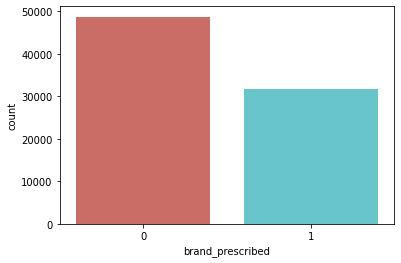

<Figure size 432x288 with 0 Axes>

In [1217]:
sns.countplot(x='brand_prescribed', data= physician, palette= 'hls')
plt.show()
plt.savefig('count_plot')

In [1218]:
count_no_sub = len(physician[physician['brand_prescribed']==0])
count_sub = len(physician[physician['brand_prescribed']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no brand presciption is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of brand presciption", pct_of_sub*100)

percentage of no brand presciption is 60.517127840662
percentage of brand presciption 39.482872159337994


In [1219]:
54.615/45.385

1.2033711578715436

- Our classes are quite balanced, and the ratio of no-presciption to presciption instances is 6:5

#### Looking at the mean of the data to analyse further.

In [1220]:
pd.set_option('display.max_columns', None)

In [1221]:
physician.groupby('brand_prescribed').mean()

,physician_id,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,total_patient_with_insurance_plan,total_prescriptions,competitor/total
brand_prescribed,,,,,,,,,,,,,,,,,,,,,,,,,
0,5034.174270,4.853386,2.550569,0.277071,0.013694,0.080503,0.000636,0.197286,0.954872,38.499630,22.445941,39.002053,0.778364,0.490330,0.104012,0.130805,0.726769,0.798382,169.473638,20.589640,0.915903,0.639332,104.962407,99.947625,inf
1,5085.953331,8.765585,11.173459,0.430720,0.034364,0.127262,0.004972,0.169431,0.959530,81.598263,38.919155,81.445731,2.019763,1.237593,0.210215,0.268811,0.956509,0.999245,332.305378,49.840356,0.923465,0.648743,219.538251,201.963149,16.803709


#### Observations:
1. Total representative visits by sales person and total sample dropped by sales person significantly impact the Axtenna prescription by the physician.
2. brand_web_impressions and brand_ehr_impressions are understandably higher(twice) for the physicians who prescribe Axtenna as compared to who dont.
3. Physicians who treat patient_with_insurance_plan are more likely to prescribe the brand Axtenna.
4. The physicians who has higher average count of prescription are more likely to prescribe Axtenna.
5. Surprisingly, total competitor_prescription (Total prescriptions of the competitior brand drugs by physician in the given quarter) is twice the count for physicians who prescribe our brand as compare to those who dont!

In [1222]:
physician.head()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_speciality,total_patient_with_insurance_plan,year,quarter,total_prescriptions,competitor/total
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.91,0.89,M,Above 40,nephrology,0,2018,Q2,0,0.000000
1,1,0,10,11,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.91,0.89,M,Above 40,nephrology,0,2018,Q3,0,0.000000
2,1,1,8,8,0,0,0,0,0,1,24,13,17,0,0,0,0,1,1,109,19,0.91,0.89,M,Above 40,nephrology,84,2018,Q4,54,20.185185
3,1,1,11,24,0,0,0,0,0,1,50,26,29,0,0,0,0,1,1,204,18,0.91,0.89,M,Above 40,nephrology,155,2019,Q1,105,19.428571
4,1,1,15,44,0,0,0,0,0,1,49,18,30,0,0,0,0,1,1,180,37,0.91,0.89,M,Above 40,nephrology,140,2019,Q2,97,18.556701


#### We can calculate categorical means for other categorical variables such as quarter, year, gender and physician tenure to get a more detailed sense of our data.

In [1223]:
physician.groupby('quarter').mean()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,total_patient_with_insurance_plan,total_prescriptions,competitor/total
quarter,,,,,,,,,,,,,,,,,,,,,,,,,,
Q1,5065.801393,0.507744,7.669403,6.016421,0.429247,0.031474,0.114511,0.003670,0.182994,0.956273,75.852647,39.352989,76.003297,1.308329,0.534241,0.000000,0.000000,0.960192,0.999627,320.854948,42.278099,0.920035,0.643575,204.115507,191.208932,17.277367
Q2,5041.484677,0.352131,5.004014,4.544619,0.209240,0.013471,0.064073,0.001351,0.184499,0.956925,46.822063,24.288830,47.187239,1.118110,0.326115,0.005327,0.005828,0.593060,0.621430,197.232013,26.090049,0.920051,0.643218,127.011155,118.298132,10.555020
Q3,5048.208884,0.353023,6.465179,8.012611,0.398960,0.015298,0.115190,0.002427,0.189556,0.956923,44.128321,23.308212,44.346349,1.656165,1.026089,0.274886,0.322384,0.879177,0.999263,185.752849,29.275450,0.918337,0.642435,119.948992,111.782882,10.381071
Q4,5074.611749,0.411399,7.314012,5.182390,0.366595,0.035726,0.117098,0.002529,0.187836,0.956494,65.959995,34.376969,66.135706,0.899630,1.458471,0.341373,0.474810,0.953381,0.999157,276.180510,36.013681,0.916567,0.643128,178.212605,166.472671,inf


#### Observations:
1. Total Sample dropped in Quarter 3 is strangely higher as compared to other Quarters. May be 3rd Quarter comprises of month June to September, which also brings the change in weather, leading to more people eating outside and getting ill and kidney diseases.
2. There is significant drop in vouchers given to physicians in quarter 2.

In [1224]:
physician.groupby('year').mean()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,total_patient_with_insurance_plan,total_prescriptions,competitor/total
year,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,5023.892355,0.086824,4.486603,3.067041,0.376561,0.018102,0.110757,0.001252,0.184703,0.957536,17.870819,9.453154,18.064752,0.000000,0.000000,0.00000,0.000000,0.556720,0.648982,74.991879,9.727972,0.919965,0.642703,48.745179,45.388724,5.383224
2019,5075.082469,0.501651,7.949591,6.082869,0.398399,0.029358,0.087473,0.002669,0.187857,0.956931,76.364771,38.732110,76.161802,0.900984,1.277298,0.39186,0.497515,0.970742,0.999399,316.542219,41.358499,0.916999,0.642316,205.255646,191.258682,inf
2020,5065.500820,0.634582,6.704943,9.364664,0.209000,0.016537,0.099623,0.003281,0.186167,0.955398,74.463933,40.112924,75.363378,3.329018,1.104943,0.00000,0.000000,0.936954,0.999379,320.525382,47.659898,0.920066,0.644447,202.768965,189.940235,17.425030


#### Observations:
1. There is significant growth in brand prescribed by physicians over the years. Approx 6X times.
2. The ratio of competitor prescription to our brand prescription by the physician has significantly increased over the years as well.
3. There is significant drop in brand_enews_impressions	and brand_mobile_impressions by the physicians but also noticeable rise in brand_web_impressions with the consecutive years.

In [1225]:
physician.groupby('physician_gender').mean()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,total_patient_with_insurance_plan,total_prescriptions,competitor/total
physician_gender,,,,,,,,,,,,,,,,,,,,,,,,,,
F,6247.983646,0.398675,6.299067,5.833951,0.299149,0.021435,0.103663,0.000946,0.139803,0.950372,52.759373,27.737586,54.022841,1.286687,0.795594,0.146723,0.187647,0.820516,0.883038,225.540424,31.108501,0.915794,0.656930,142.398378,134.519800,inf
M,4039.428716,0.391556,6.482225,6.058223,0.370562,0.022213,0.094969,0.003541,0.225832,0.962104,57.861433,29.981466,57.237859,1.253035,0.776674,0.145281,0.183292,0.814891,0.873137,240.760279,33.015016,0.921521,0.631239,156.837242,145.080758,13.014544


#### Observation:
1. Though the total representative visits by salesperson is approx equal, still the total samples dropped are high for the male physician as compared to female physician.

### Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with any other variable


In [1226]:
table = pd.pivot_table(physician, values='brand_prescribed', index=['year', 'quarter'],
                    columns=['physician_hospital_affiliation'], aggfunc=np.sum)
table

physician_hospital_affiliation     0    1
year quarter                             
2018 Q2                            0    0
     Q3                           27    5
     Q4                         2034  361
2019 Q1                         2664  497
     Q2                         3300  662
     Q3                         3280  684
     Q4                         3244  706
2020 Q1                         4163  839
     Q2                         4264  897
     Q3                         3417  733

In [1227]:
(physician['physician_hospital_affiliation'].value_counts(normalize=True)*100).sort_index()

0    81.371221
1    18.628779
Name: physician_hospital_affiliation, dtype: float64

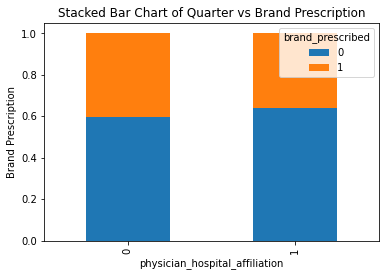

In [1228]:
table=pd.crosstab(physician.physician_hospital_affiliation,physician.brand_prescribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Quarter vs Brand Prescription')
plt.xlabel('physician_hospital_affiliation')
plt.ylabel('Brand Prescription')
plt.savefig('quarter_vs_brand_Prescription')

#### Observation:
1. The physicians which are not affiliated to any hospital are more in count hence they are prescribing our brand more, which seems to be understood here.

In [1229]:
table = pd.pivot_table(physician, values='new_prescriptions', index=['year', 'quarter'],
                    columns=['physician_hospital_affiliation'], aggfunc=np.sum)
table

physician_hospital_affiliation       0      1
year quarter                                 
2018 Q2                              0      0
     Q3                           1691    709
     Q4                         219510  50016
2019 Q1                         260959  59976
     Q2                         267507  62919
     Q3                         243573  58874
     Q4                         230993  54920
2020 Q1                         289845  68925
     Q2                         279004  66511
     Q3                         299548  71136

#### Observation:
1. There is observed a decline from 2019 Q3 to 2019 Q4 in new prescription by the physicians which are affiliated to hospital, but then there can be seen a high growth from 2020 Q2 to Q3 approx 2X times

In [1230]:
table = pd.pivot_table(physician, values='brand_prescribed', index=['year', 'quarter'],
                    columns=['brand_organic_web_visits'], aggfunc=np.sum)
table

brand_organic_web_visits    0     1
year quarter                       
2018 Q2                     0     0
     Q3                     2    30
     Q4                   130  2265
2019 Q1                    61  3100
     Q2                   143  3819
     Q3                   104  3860
     Q4                   104  3846
2020 Q1                   263  4739
     Q2                   260  4901
     Q3                   315  3835

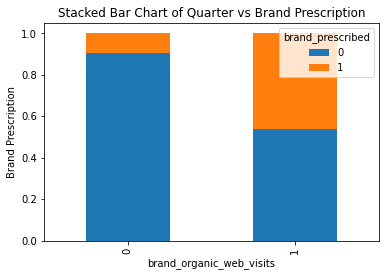

In [1231]:
table=pd.crosstab(physician.brand_organic_web_visits,physician.brand_prescribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Quarter vs Brand Prescription')
plt.xlabel('brand_organic_web_visits')
plt.ylabel('Brand Prescription')
plt.savefig('organic_vs_brand_Prescription')

#### Observation:
1. brand_organic_web_visits might be a good predictor of the outcome variable, as the physicians who are not doing brand_organic_web_visits are more likely to not prescribe the brand.

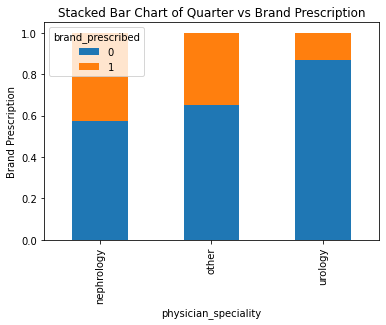

In [1232]:
table=pd.crosstab(physician.physician_speciality,physician.brand_prescribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Quarter vs Brand Prescription')
plt.xlabel('physician_speciality')
plt.ylabel('Brand Prescription')
plt.savefig('physician_speciality_vs_brand_Prescription')


#### Observation : 
1. physician_speciality with nephrology prescribes more of the brand as compared to other specialists.

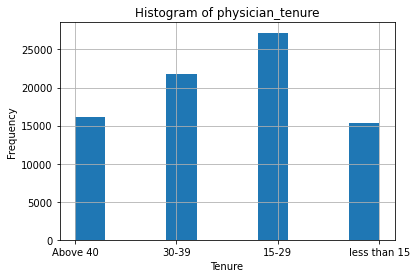

In [1233]:
physician.physician_tenure.hist()
plt.title('Histogram of physician_tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.savefig('hist_tenure')

#### Observation: Most of the physician have their tenure between 15 to 29 years.

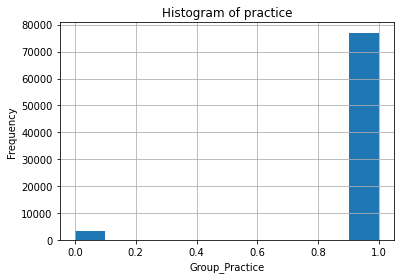

In [1234]:
physician.physician_in_group_practice.hist()
plt.title('Histogram of practice')
plt.xlabel('Group_Practice')
plt.ylabel('Frequency')
plt.savefig('hist_prac')

#### Observation:
Maximum physician perform the practice in group!!

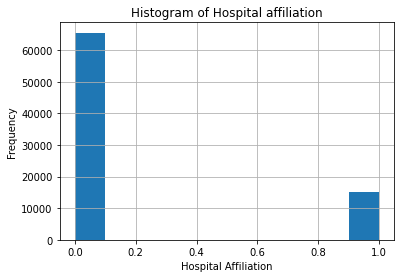

In [1235]:
physician.physician_hospital_affiliation.hist()
plt.title('Histogram of Hospital affiliation')
plt.xlabel('Hospital Affiliation')
plt.ylabel('Frequency')
plt.savefig('hist_aff')

### Observation:
Most of the physicians do not hold any hospital affiliation!

In [1236]:
physician.head()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_speciality,total_patient_with_insurance_plan,year,quarter,total_prescriptions,competitor/total
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.91,0.89,M,Above 40,nephrology,0,2018,Q2,0,0.000000
1,1,0,10,11,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.91,0.89,M,Above 40,nephrology,0,2018,Q3,0,0.000000
2,1,1,8,8,0,0,0,0,0,1,24,13,17,0,0,0,0,1,1,109,19,0.91,0.89,M,Above 40,nephrology,84,2018,Q4,54,20.185185
3,1,1,11,24,0,0,0,0,0,1,50,26,29,0,0,0,0,1,1,204,18,0.91,0.89,M,Above 40,nephrology,155,2019,Q1,105,19.428571
4,1,1,15,44,0,0,0,0,0,1,49,18,30,0,0,0,0,1,1,180,37,0.91,0.89,M,Above 40,nephrology,140,2019,Q2,97,18.556701


### Create Dummy Variables

In [1237]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(physician[['physician_gender','physician_tenure','physician_speciality','year','quarter']], drop_first=True)

# Adding the results to the master dataframe
physician = pd.concat([physician, dummy1], axis=1)

In [1238]:
#We have created dummies for the below variables, so we can drop them
physician = physician.drop(['physician_gender','physician_tenure','physician_speciality','year','quarter'], 1)

#### Our final data columns will be:

In [1239]:
physician.head(100)

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,total_patient_with_insurance_plan,total_prescriptions,competitor/total,physician_gender_M,physician_tenure_15-29,physician_tenure_30-39,physician_tenure_Above 40,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_Q2,quarter_Q3,quarter_Q4
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.91,0.89,0,0,0.000000,1,0,0,1,0,0,0,0,1,0,0
1,1,0,10,11,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.91,0.89,0,0,0.000000,1,0,0,1,0,0,0,0,0,1,0
2,1,1,8,8,0,0,0,0,0,1,24,13,17,0,0,0,0,1,1,109,19,0.91,0.89,84,54,20.185185,1,0,0,1,0,0,0,0,0,0,1
3,1,1,11,24,0,0,0,0,0,1,50,26,29,0,0,0,0,1,1,204,18,0.91,0.89,155,105,19.428571,1,0,0,1,0,0,1,0,0,0,0
4,1,1,15,44,0,0,0,0,0,1,49,18,30,0,0,0,0,1,1,180,37,0.91,0.89,140,97,18.556701,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,12,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1.00,0.08,0,0,0.000000,1,0,1,0,1,0,0,0,0,1,0
112,12,0,0,0,0,0,0,0,0,1,11,3,3,0,0,0,0,1,1,40,7,1.00,0.08,27,17,23.529412,1,0,1,0,1,0,0,0,0,0,1
113,12,0,0,0,0,0,0,0,0,1,15,4,6,0,0,0,0,1,1,55,4,1.00,0.08,41,25,22.000000,1,0,1,0,1,0,1,0,0,0,0
114,12,0,0,0,0,0,0,0,0,1,16,2,8,0,0,0,0,1,1,55,4,1.00,0.08,42,26,21.153846,1,0,1,0,1,0,1,0,1,0,0


In [1240]:
(physician['percent_population_with_health_insurance_in_last10q'].value_counts(normalize=True)*100).sort_index()

0.01    0.820049
0.02    0.746742
0.03    0.893356
0.04    0.675919
0.05    0.710709
          ...   
0.96    4.968751
0.97    3.638035
0.98    2.386839
0.99    0.634917
1.00    0.079520
Name: percent_population_with_health_insurance_in_last10q, Length: 97, dtype: float64

### Feature Standardisation

In [1241]:
# Normalising continuous features
df = physician[['total_representative_visits','total_sample_dropped','saving_cards_dropped','vouchers_dropped',
              'total_seminar_as_attendee','total_seminar_as_speaker','total_prescriptions_for_indication1',
              'total_prescriptions_for_indication2','total_prescriptions_for_indication3','brand_web_impressions',
             'brand_ehr_impressions','brand_mobile_impressions','total_competitor_prescription','new_prescriptions',
             'urban_population_perc_in_physician_locality','percent_population_with_health_insurance_in_last10q',
              'total_patient_with_insurance_plan','total_prescriptions','competitor/total']]

In [1242]:
normalized_df=(df-df.mean())/df.std()
physician = physician.drop(['total_representative_visits','total_sample_dropped','saving_cards_dropped','vouchers_dropped',
              'total_seminar_as_attendee','total_seminar_as_speaker','total_prescriptions_for_indication1',
              'total_prescriptions_for_indication2','total_prescriptions_for_indication3','brand_web_impressions',
             'brand_ehr_impressions','brand_mobile_impressions','total_competitor_prescription','new_prescriptions',
             'urban_population_perc_in_physician_locality','percent_population_with_health_insurance_in_last10q',
              'total_patient_with_insurance_plan','total_prescriptions','competitor/total'], 1)
physician = pd.concat([physician,normalized_df],axis=1)
physician.head()

,physician_id,brand_prescribed,physician_hospital_affiliation,physician_in_group_practice,brand_enews_impressions,brand_organic_web_visits,brand_paidsearch_visits,physician_gender_M,physician_tenure_15-29,physician_tenure_30-39,physician_tenure_Above 40,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_Q2,quarter_Q3,quarter_Q4,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,brand_web_impressions,brand_ehr_impressions,brand_mobile_impressions,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,total_patient_with_insurance_plan,total_prescriptions,competitor/total
0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,-1.105599,-0.503516,-0.275732,-0.104026,-0.331411,-0.048516,-1.086099,-0.734781,-1.022972,-0.553261,-0.293356,-0.414519,-1.069639,-0.792109,-0.052187,0.765617,-1.061015,-1.069378,NaN
1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0.622430,0.426551,-0.275732,-0.104026,3.017361,-0.048516,-1.086099,-0.734781,-1.022972,-0.553261,-0.293356,-0.414519,-1.069639,-0.792109,-0.052187,0.765617,-1.061015,-1.069378,NaN
2,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0.276824,0.172897,-0.275732,-0.104026,-0.331411,-0.048516,-0.616571,-0.404828,-0.711091,-0.553261,-0.293356,-0.414519,-0.570886,-0.323823,-0.052187,0.765617,-0.467639,-0.657569,NaN
3,1,1,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0.795233,1.525721,-0.275732,-0.104026,-0.331411,-0.048516,-0.107917,-0.074875,-0.490939,-0.553261,-0.293356,-0.414519,-0.136193,-0.348470,-0.052187,0.765617,0.033906,-0.268639,NaN
4,1,1,0,1,0,1,1,1,0,0,1,0,0,1,0,1,0,0,1.486444,3.216751,-0.275732,-0.104026,-0.331411,-0.048516,-0.127481,-0.277923,-0.472593,-0.553261,-0.293356,-0.414519,-0.246010,0.119815,-0.052187,0.765617,-0.072055,-0.329647,NaN


In [1243]:
# Checking the brand prescribed rate
brand_prescribed = (sum(physician['brand_prescribed'])/len(physician['brand_prescribed'].index))*100
brand_prescribed

39.482872159337994

#### We have almost 39% brand prescribed rate

### Looking at Correlations

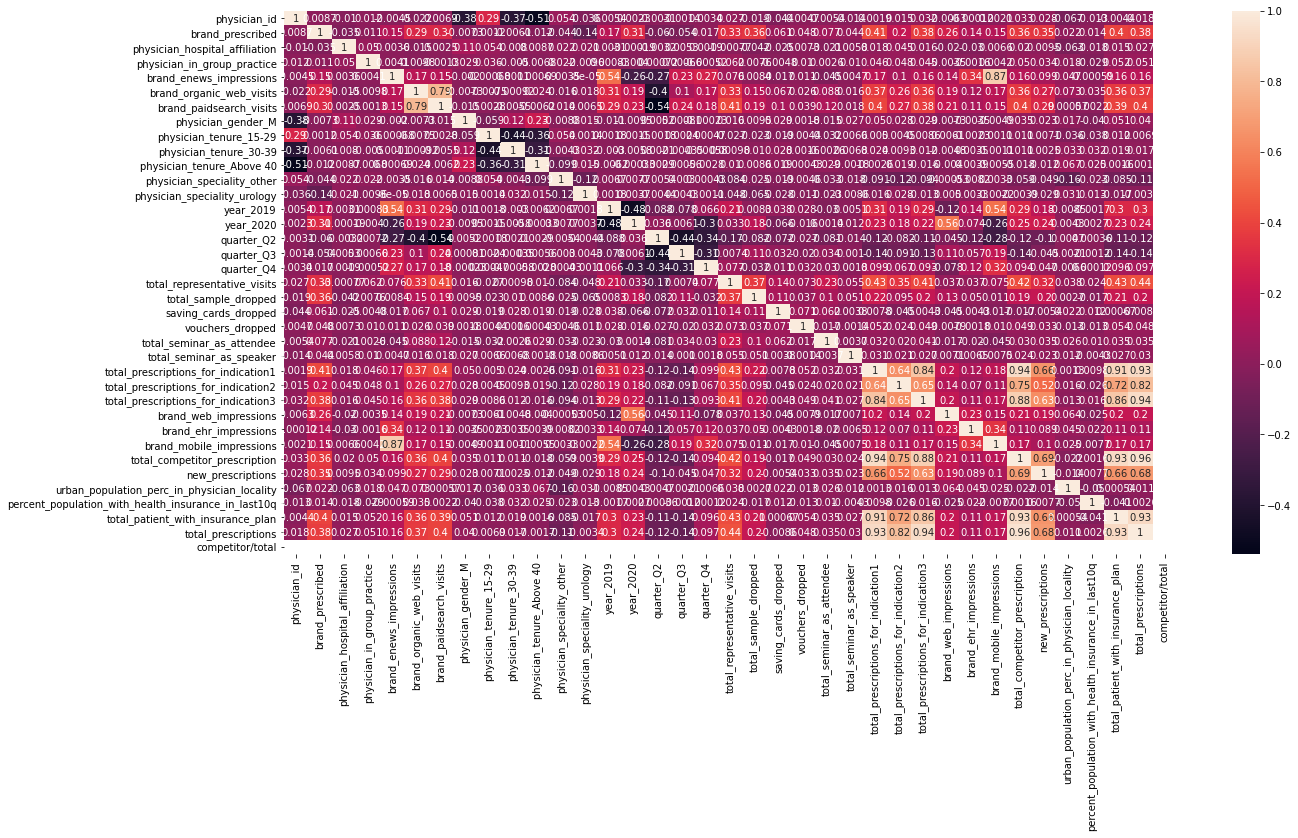

In [1244]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(physician.corr(),annot = True)
plt.show()

In [1245]:
#Dropping highly corelated variables
physician = physician.drop(['total_prescriptions_for_indication1','competitor/total','total_prescriptions_for_indication2',
                      'total_prescriptions_for_indication3', 'brand_mobile_impressions', 'brand_paidsearch_visits',
                            'total_competitor_prescription','total_patient_with_insurance_plan'], 1)

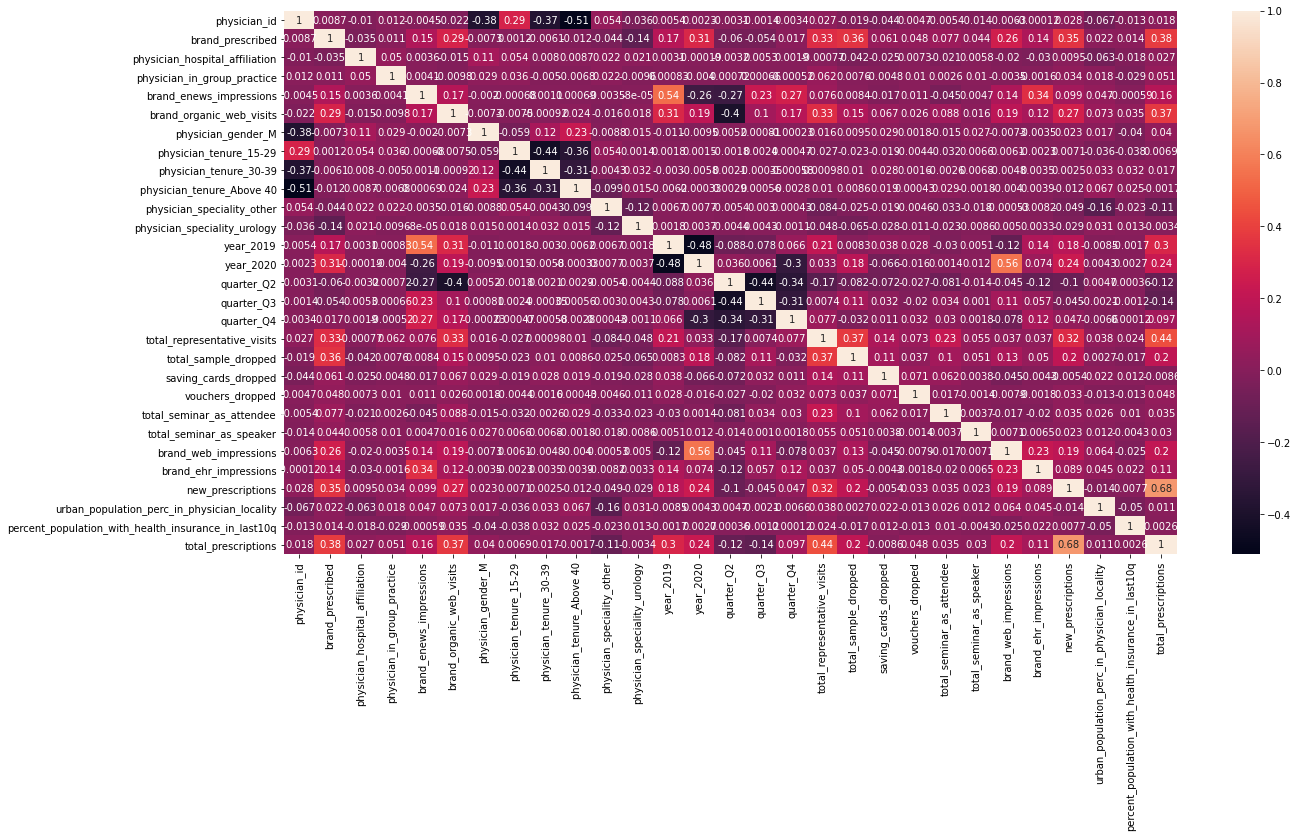

In [1246]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(physician.corr(),annot = True)
plt.show()

In [1247]:
physician.head()

,physician_id,brand_prescribed,physician_hospital_affiliation,physician_in_group_practice,brand_enews_impressions,brand_organic_web_visits,physician_gender_M,physician_tenure_15-29,physician_tenure_30-39,physician_tenure_Above 40,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_Q2,quarter_Q3,quarter_Q4,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,brand_web_impressions,brand_ehr_impressions,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,total_prescriptions
0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,-1.105599,-0.503516,-0.275732,-0.104026,-0.331411,-0.048516,-0.553261,-0.293356,-0.792109,-0.052187,0.765617,-1.069378
1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0.622430,0.426551,-0.275732,-0.104026,3.017361,-0.048516,-0.553261,-0.293356,-0.792109,-0.052187,0.765617,-1.069378
2,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0.276824,0.172897,-0.275732,-0.104026,-0.331411,-0.048516,-0.553261,-0.293356,-0.323823,-0.052187,0.765617,-0.657569
3,1,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0.795233,1.525721,-0.275732,-0.104026,-0.331411,-0.048516,-0.553261,-0.293356,-0.348470,-0.052187,0.765617,-0.268639
4,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1.486444,3.216751,-0.275732,-0.104026,-0.331411,-0.048516,-0.553261,-0.293356,0.119815,-0.052187,0.765617,-0.329647


### Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [1248]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = physician.drop(['brand_prescribed','physician_id'],axis=1)

# Putting response variable to y
y = physician['brand_prescribed']

y.head()

0    0
1    0
2    1
3    1
4    1
Name: brand_prescribed, dtype: int64

In [1249]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Running Your First Training Model

In [1250]:
import statsmodels.api as sm

In [1251]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       brand_prescribed   No. Observations:                56338
Model:                            GLM   Df Residuals:                    56310
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24715.
Date:                Mon, 15 Mar 2021   Deviance:                       49429.
Time:                        11:33:54   Pearson chi2:                 5.99e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -3.2508      0.085    -38.208      0.000      -3.418      -3.084
physician_hospital_affiliation                         -0.1820      0.029     -6.288      0.000      -0.239      -0.125
physician_in_group_practice                            -0.0056      0.054     -0.104      0.917      -0.111       0.099
brand_enews_impressions                                 0.1814      0.044      4.091      0.000       0.094       0.268
brand_organic_web_visits                                0.5931      0.049     12.185      0.000       0.498       0.688
physician_gender_M                                      0.0059      0.024      0.247      0.805      -0.041       0.053
physician_tenure_15-29                                  0.0376      0.032      1.164      0.244      -0.026       0.101
physician_tenure_30-39                                 -0.0655      0.035     -1.897      0.058      -0.133       0.002
physician_tenure_Above 40                              -0.1112      0.038     -2.937      0.003      -0.185      -0.037
physician_speciality_other                             -0.3134      0.030    -10.474      0.000      -0.372      -0.255
physician_speciality_urology                           -1.8517      0.058    -32.129      0.000      -1.965      -1.739
year_2019                                               2.3957      0.049     48.472      0.000       2.299       2.493
year_2020                                               3.3145      0.054     61.638      0.000       3.209       3.420
quarter_Q2                                              0.2005      0.031      6.572      0.000       0.141       0.260
quarter_Q3                                              0.0476      0.038      1.253      0.210      -0.027       0.122
quarter_Q4                                              1.2460      0.047     26.515      0.000       1.154       1.338
total_representative_visits                             0.3396      0.014     24.807      0.000       0.313       0.366
total_sample_dropped                                    0.7867      0.018     44.222      0.000       0.752       0.822
saving_cards_dropped                                    0.1183      0.011     10.693      0.000       0.097       0.140
vouchers_dropped                                        0.0514      0.011      4.826      0.000       0.031       0.072
total_seminar_as_attendee                               0.1236      0.011     10.968      0.000       0.101       0.146
total_seminar_as_speaker                                0.0625      0.014      4.457      0.000       0.035       0.090
brand_web_impressions                                   0.0155      0.013      1.19

###  Feature Selection Using RFE

In [1252]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1253]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [1254]:
rfe.support_

array([ True, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False, False, False])

In [1255]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('physician_hospital_affiliation', True, 1),
 ('physician_in_group_practice', False, 13),
 ('brand_enews_impressions', True, 1),
 ('brand_organic_web_visits', True, 1),
 ('physician_gender_M', False, 12),
 ('physician_tenure_15-29', False, 5),
 ('physician_tenure_30-39', False, 2),
 ('physician_tenure_Above 40', True, 1),
 ('physician_speciality_other', True, 1),
 ('physician_speciality_urology', True, 1),
 ('year_2019', True, 1),
 ('year_2020', True, 1),
 ('quarter_Q2', True, 1),
 ('quarter_Q3', False, 6),
 ('quarter_Q4', True, 1),
 ('total_representative_visits', True, 1),
 ('total_sample_dropped', True, 1),
 ('saving_cards_dropped', True, 1),
 ('vouchers_dropped', False, 4),
 ('total_seminar_as_attendee', True, 1),
 ('total_seminar_as_speaker', False, 3),
 ('brand_web_impressions', False, 10),
 ('brand_ehr_impressions', False, 11),
 ('new_prescriptions', True, 1),
 ('urban_population_perc_in_physician_locality', False, 8),
 ('percent_population_with_health_insurance_in_last10q', Fa

In [1256]:
col = X_train.columns[rfe.support_]

In [1257]:
X_train.columns[~rfe.support_]

Index(['physician_in_group_practice', 'physician_gender_M',
       'physician_tenure_15-29', 'physician_tenure_30-39', 'quarter_Q3',
       'vouchers_dropped', 'total_seminar_as_speaker', 'brand_web_impressions',
       'brand_ehr_impressions', 'urban_population_perc_in_physician_locality',
       'percent_population_with_health_insurance_in_last10q',
       'total_prescriptions'],
      dtype='object')

#### Assessing the model with StatsModels

In [1258]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       brand_prescribed   No. Observations:                56338
Model:                            GLM   Df Residuals:                    56322
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24757.
Date:                Mon, 15 Mar 2021   Deviance:                       49514.
Time:                        11:33:58   Pearson chi2:                 5.94e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.2582      0.055    -59.547      0.000      -3.365      -3.151
physician_hospital_affiliation    -0.1839      0.029     -6.438      0.000      -0.240      -0.128
brand_enews_impressions            0.2394      0.036      6.669      0.000       0.169       0.310
brand_organic_web_visits           0.6132      0.048     12.725      0.000       0.519       0.708
physician_tenure_Above 40         -0.0990      0.028     -3.552      0.000      -0.154      -0.044
physician_speciality_other        -0.3330      0.029    -11.377      0.000      -0.390      -0.276
physician_speciality_urology      -1.8529      0.058    -32.207      0.000      -1.966      -1.740
year_2019                          2.3806      0.043     54.980      0.000       2.296       2.465
year_2020                          3.3347      0.045     74.920      0.000       3.247       3.422
quarter_Q2                         0.1852      0.027      6.773      0.000       0.132       0.239
quarter_Q4                         1.2209      0.035     34.438      0.000       1.151       1.290
total_representative_visits        0.3520      0.013     26.914      0.000       0.326       0.378
total_sample_dropped               0.7834      0.018     44.428      0.000       0.749       0.818
saving_cards_dropped               0.1206      0.011     10.965      0.000       0.099       0.142
total_seminar_as_attendee          0.1221      0.011     10.858      0.000       0.100       0.144
new_prescriptions                  0.2852      0.012     24.206      0.000       0.262       0.308
==================================================================================================
"""

In [1259]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

94959    0.830175
72960    0.015423
34177    0.106706
25484    0.256518
11401    0.023995
97110    0.011104
73417    0.639096
99380    0.015423
2076     0.891156
90359    0.272953
dtype: float64

In [1260]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.83017534, 0.01542304, 0.10670561, 0.25651766, 0.02399486,
       0.01110381, 0.63909582, 0.01542304, 0.89115564, 0.27295322])

#### Creating a dataframe with the actual prediction flag and the predicted probabilities

In [1261]:
y_train_pred_final = pd.DataFrame({'Class':y_train.values, 'Pred_Prob':y_train_pred})
y_train_pred_final['physician_id'] = y_train.index
y_train_pred_final.head(10)

,Class,Pred_Prob,physician_id
0,0,0.830175,94959
1,0,0.015423,72960
2,0,0.106706,34177
3,0,0.256518,25484
4,0,0.023995,11401
5,0,0.011104,97110
6,1,0.639096,73417
7,0,0.015423,99380
8,1,0.891156,2076
9,1,0.272953,90359


#### Creating new column 'predicted' with 1 if Predicted_Prob > 0.5 else 0

In [1262]:
y_train_pred_final['predicted'] = y_train_pred_final.Pred_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Class,Pred_Prob,physician_id,predicted
0,0,0.830175,94959,1
1,0,0.015423,72960,0
2,0,0.106706,34177,0
3,0,0.256518,25484,0
4,0,0.023995,11401,0
5,0,0.011104,97110,0
6,1,0.639096,73417,1
7,0,0.015423,99380,0
8,1,0.891156,2076,1
9,1,0.272953,90359,0


In [1263]:
from sklearn import metrics

In [1264]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.predicted )
print(confusion)

[[27895  6153]
 [ 6538 15752]]


In [1265]:
# Predicted     not_churn    churn
# Actual
# not_churn        27895      6153
# churn            6538       15752  

In [1266]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.predicted))

0.7747346373673187


In [1267]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1268]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,brand_organic_web_visits,5.87
6,year_2019,4.26
7,year_2020,3.09
1,brand_enews_impressions,1.94
9,quarter_Q4,1.71
8,quarter_Q2,1.48
10,total_representative_visits,1.42
14,new_prescriptions,1.28
3,physician_tenure_Above 40,1.24
4,physician_speciality_other,1.23


#### Though VIF seems to be fine for the respective variables, we will drop the variable with highest VIF and will check if that helps our model

In [1269]:
col = col.drop('brand_organic_web_visits', 1)
col

Index(['physician_hospital_affiliation', 'brand_enews_impressions',
       'physician_tenure_Above 40', 'physician_speciality_other',
       'physician_speciality_urology', 'year_2019', 'year_2020', 'quarter_Q2',
       'quarter_Q4', 'total_representative_visits', 'total_sample_dropped',
       'saving_cards_dropped', 'total_seminar_as_attendee',
       'new_prescriptions'],
      dtype='object')

In [1270]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       brand_prescribed   No. Observations:                56338
Model:                            GLM   Df Residuals:                    56323
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24841.
Date:                Mon, 15 Mar 2021   Deviance:                       49682.
Time:                        11:34:00   Pearson chi2:                 6.00e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.8005      0.039    -72.357      0.000      -2.876      -2.725
physician_hospital_affiliation    -0.1929      0.029     -6.762      0.000      -0.249      -0.137
brand_enews_impressions            0.2085      0.036      5.818      0.000       0.138       0.279
physician_tenure_Above 40         -0.0858      0.028     -3.080      0.002      -0.140      -0.031
physician_speciality_other        -0.3437      0.029    -11.747      0.000      -0.401      -0.286
physician_speciality_urology      -1.8486      0.058    -32.082      0.000      -1.962      -1.736
year_2019                          2.5227      0.041     60.826      0.000       2.441       2.604
year_2020                          3.4634      0.043     80.826      0.000       3.379       3.547
quarter_Q2                         0.1558      0.027      5.767      0.000       0.103       0.209
quarter_Q4                         1.2865      0.035     36.635      0.000       1.218       1.355
total_representative_visits        0.3633      0.013     27.852      0.000       0.338       0.389
total_sample_dropped               0.7812      0.018     44.242      0.000       0.747       0.816
saving_cards_dropped               0.1239      0.011     11.258      0.000       0.102       0.145
total_seminar_as_attendee          0.1263      0.011     11.213      0.000       0.104       0.148
new_prescriptions                  0.2842      0.012     24.081      0.000       0.261       0.307
==================================================================================================
"""

In [1271]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1272]:
y_train_pred[:10]

array([0.82286742, 0.02318405, 0.10373561, 0.24599934, 0.02069653,
       0.0165522 , 0.63139697, 0.02318405, 0.8950696 , 0.26848768])

In [1273]:
y_train_pred_final['Pred_Prob'] = y_train_pred

In [1274]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Pred_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Class,Pred_Prob,physician_id,predicted
0,0,0.822867,94959,1
1,0,0.023184,72960,0
2,0,0.103736,34177,0
3,0,0.245999,25484,0
4,0,0.020697,11401,0


In [1275]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.predicted))

0.7748233874116937


#### So overall the accuracy did increase by 0.01, but it seems this is good fit, since all our variable VIF are in a permissible range

## Metrics beyond simply Accuracy

In [1276]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1277]:
# Let's see the sensitivity of our logistic regression model
# Its is also know as Recall
TP / float(TP+FN)

0.7066846119336025

In [1278]:
# Let us calculate specificity
TN / float(TN+FP)

0.8192845394736842

In [1279]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.1807154605263158


In [1280]:
# positive predictive value or Precision
print (TP / float(TP+FP))

0.7191052271170966


In [1281]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8101240089449075


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1282]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1283]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Class, y_train_pred_final.Pred_Prob, drop_intermediate = False )

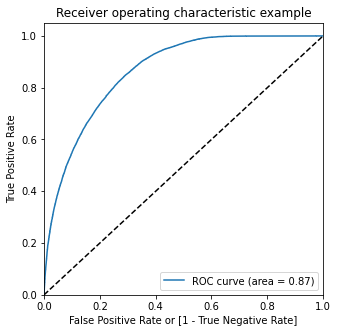

In [1284]:
draw_roc(y_train_pred_final.Class, y_train_pred_final.Pred_Prob)

#### Area covered by ROC curve =  0.87

### Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1285]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Pred_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Pred_Prob,physician_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.822867,94959,1,1,1,1,1,1,1,1,1,1,0
1,0,0.023184,72960,0,1,0,0,0,0,0,0,0,0,0
2,0,0.103736,34177,0,1,1,0,0,0,0,0,0,0,0
3,0,0.245999,25484,0,1,1,1,0,0,0,0,0,0,0
4,0,0.020697,11401,0,1,0,0,0,0,0,0,0,0,0


In [1286]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.395648  1.000000  0.000000
0.1   0.1  0.661791  0.987663  0.448455
0.2   0.2  0.709734  0.954688  0.549371
0.3   0.3  0.748305  0.903230  0.646881
0.4   0.4  0.767617  0.826738  0.728912
0.5   0.5  0.774823  0.705249  0.820371
0.6   0.6  0.764014  0.566128  0.893562
0.7   0.7  0.736288  0.420502  0.943022
0.8   0.8  0.698232  0.276267  0.974477
0.9   0.9  0.656023  0.144818  0.990690


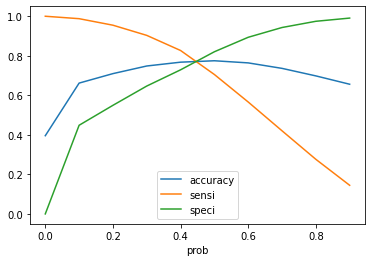

In [1287]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.43 is the optimum point to take it as a cutoff probability.

In [1288]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Pred_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Class,Pred_Prob,physician_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.822867,94959,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.023184,72960,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.103736,34177,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.245999,25484,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.020697,11401,0,1,0,0,0,0,0,0,0,0,0,0


In [1289]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)

0.7714686357343179

In [1290]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2

array([[25760,  8288],
       [ 4587, 17703]], dtype=int64)

In [1291]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1292]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7942126514131898

In [1293]:
# Let us calculate specificity
TN / float(TN+FP)

0.756578947368421

In [1294]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.24342105263157895


In [1295]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6811203878265554


In [1296]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8488483210861041


### Precision and Recall

In [1297]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.predicted )
confusion

array([[27932,  6116],
       [ 6570, 15720]], dtype=int64)

#### Precision
TP / TP + FP

In [1298]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7199120718080234

#### Recall
TP / TP + FN

In [1299]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7052489905787349

#### Using sklearn utilities for the same

In [1300]:
from sklearn.metrics import precision_score, recall_score

In [1301]:
precision_score(y_train_pred_final.Class, y_train_pred_final.predicted)

0.7199120718080234

In [1302]:
recall_score(y_train_pred_final.Class, y_train_pred_final.predicted)

0.7052489905787349

### F1 Score:
#### 2 x ((precision x recall)/(precision + recall))

In [1303]:
precision= precision_score(y_train_pred_final.Class, y_train_pred_final.predicted)
recall= recall_score(y_train_pred_final.Class, y_train_pred_final.predicted)
F1_score= 2*((precision*recall)/(precision + recall))
print('F1_Score:' +str(F1_score))

F1_Score:0.7125050990345828


#### Precision and recall tradeoff

In [1304]:
from sklearn.metrics import precision_recall_curve

In [1305]:
y_train_pred_final.Class, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 56333    0
 56334    1
 56335    1
 56336    0
 56337    1
 Name: Class, Length: 56338, dtype: int64,
 0        1
 1        0
 2        0
 3        0
 4        0
         ..
 56333    0
 56334    1
 56335    1
 56336    0
 56337    1
 Name: predicted, Length: 56338, dtype: int64)

In [1306]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Class, y_train_pred_final.Pred_Prob)

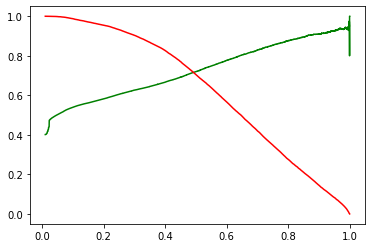

In [1307]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predict the values in the given prediction file

- First we will predict the values in the given prediction file
- The output data will have 1503 rows(Includes the header row) and 1 column named 'Predicted drug adoption class'. The row values are expected to be integers, corresponding to the data provided “Physicians_id.csv”, in that order.

##### Below is the executed code in order to export

In [1308]:
 
## y_test_df = pd.read_csv(r'C:\Users\hp.LAPTOP-MVJ2BS37\OneDrive\Documents\Jupiter Notebook\Files\Axtria_Round2\Test Data\Physicians_id.csv')

#Removing index for both dataframes to append them side by side 
## y_pred_1.reset_index(drop=True, inplace=True)
## y_test_df.reset_index(drop=True, inplace=True)

#Appending y_test_df and y_pred_1
## y_pred_final = pd.concat([y_test_df, y_pred_1], join = 'inner',axis=1) 

#Renaming the column 
## y_pred_final= y_pred_final.rename(columns={ 0 : 'Pred_Prob'})

## y_pred_final['Predicted drug adoption class'] = y_pred_final.Pred_Prob.map(lambda x: 1 if x > 0.42 else 0)
## y_pred_final.head()

## y_pred_final.drop(['physician_id', 'Pred_Prob'], axis='columns', inplace=True)

#Exporting the prediction file
## y_pred_final.to_csv(r'C:\Users\hp.LAPTOP-MVJ2BS37\OneDrive\Documents\Jupiter Notebook\Files\Axtria_Round2\Test Data\predictions.csv', index = False)


### Making predictions on the Test Set

In [1309]:
X_test = X_test[col]
X_test.head()

,physician_hospital_affiliation,brand_enews_impressions,physician_tenure_Above 40,physician_speciality_other,physician_speciality_urology,year_2019,year_2020,quarter_Q2,quarter_Q4,total_representative_visits,total_sample_dropped,saving_cards_dropped,total_seminar_as_attendee,new_prescriptions
1677,0,0,1,0,0,0,1,0,0,0.968036,3.216751,-0.275732,-0.331411,-0.644229
86378,1,0,0,0,0,0,1,1,0,-0.414387,-0.503516,-0.275732,-0.331411,0.341635
98079,0,0,0,0,0,0,1,0,0,-1.105599,-0.503516,-0.275732,-0.331411,1.081033
10745,0,1,0,1,0,1,0,0,0,-1.105599,-0.503516,-0.275732,-0.331411,-0.594936
98074,0,0,0,0,0,1,0,1,0,-1.105599,-0.503516,-0.275732,-0.331411,-0.742815


In [1310]:
X_test_sm = sm.add_constant(X_test)

In [1311]:
y_test_pred = res.predict(X_test_sm)

In [1312]:
y_test_pred[:10]

1677     0.960175
86378    0.525693
98079    0.524728
10745    0.189519
98074    0.230745
70037    0.728123
27794    0.247203
6506     0.989024
56850    0.013688
55330    0.019194
dtype: float64

In [1313]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1314]:
# Let's see the head
y_pred_1.head()

,0
1677,0.960175
86378,0.525693
98079,0.524728
10745,0.189519
98074,0.230745


In [1315]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1316]:
# Putting physician_id to index
y_test_df['physician_id'] = y_test_df.index

In [1317]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1318]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1319]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Pred_Prob'})
y_pred_final

,brand_prescribed,physician_id,Pred_Prob
0,1,1677,0.960175
1,1,86378,0.525693
2,0,98079,0.524728
3,0,10745,0.189519
4,0,98074,0.230745
...,...,...,...
24140,1,8236,0.668660
24141,1,54313,0.718345
24142,0,13353,0.298920
24143,1,10437,0.487096


In [1320]:
y_pred_final['final_predicted'] = y_pred_final.Pred_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,brand_prescribed,physician_id,Pred_Prob,final_predicted
0,1,1677,0.960175,1
1,1,86378,0.525693,1
2,0,98079,0.524728,1
3,0,10745,0.189519,0
4,0,98074,0.230745,0


In [1321]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.brand_prescribed, y_pred_final.final_predicted),3)

0.771

In [1322]:
confusion2 = metrics.confusion_matrix(y_pred_final.brand_prescribed, y_pred_final.final_predicted )
confusion2

array([[11005,  3653],
       [ 1873,  7614]], dtype=int64)

In [1323]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1324]:
# Let's see the sensitivity of our logistic regression model
recall= TP / float(TP+FN)
recall

0.8025719405502266

In [1325]:
# Let us calculate specificity
TN / float(TN+FP)


0.7507845545094829

In [1326]:
# Let us calculate precision
precision= TP / float(TP+FP)
precision

0.6757788231117423

#### F1 score

In [1327]:
F1_score= 2*((precision*recall)/(precision + recall))
print('F1_Score: ' +str(F1_score))

F1_Score: 0.7337380745880312


#### We have an overall accuracy of 0.77 on our model with F1Score of 0.73 on our test data

Hence we created a model that `identifies the prospective physicians` who have high likelihood to start prescribing the drug in `11th quarter for the first time` with an overall accuracy of 0.77.